# Vérification du codage de la distance au bord le plus proche

In [1]:
from trustutils import run 
from trustutils import visit
from trustutils.jupyter import plot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

run.introduction("C. Reiss","29/04/2022")
run.description(r'On teste les fonctions qui permet de remplir le tableau de distance au bord le plus proche et de le post-traiter. Pour determiner cette distance, l\'algorithme charge l\'ensemble des coordonnees des centres des faces de bord, ainsi que les sommets et les aretes. Il echange ces informations entre processeurs. Il utilise ensuite la fonction findClosestTupleId de MEDcoupling pour faire une recherche efficace. Cette methode n\'est pas exacte pour les maillages deformes ou de tetraedres car la projection du centre d\'un element de volume sur une face peut ne pas etre pile sur un centre de gravite de face ou sur un sommet. Pour que les resultats soient exacts dans les elements de bord, on fait une boucle sur ceux-ci en fin d\'iteration.')

run.TRUST_parameters()

## Introduction 
 Validation made by : C. Reiss



 Report created : 29/04/2022



 Report generated 29/04/2022

### Description 
On teste les fonctions qui permet de remplir le tableau de distance au bord le plus proche et de le post-traiter. Pour determiner cette distance, l\'algorithme charge l\'ensemble des coordonnees des centres des faces de bord, ainsi que les sommets et les aretes. Il echange ces informations entre processeurs. Il utilise ensuite la fonction findClosestTupleId de MEDcoupling pour faire une recherche efficace. Cette methode n\'est pas exacte pour les maillages deformes ou de tetraedres car la projection du centre d\'un element de volume sur une face peut ne pas etre pile sur un centre de gravite de face ou sur un sommet. Pour que les resultats soient exacts dans les elements de bord, on fait une boucle sur ceux-ci en fin d\'iteration.

### TRUST parameters 
 * Version TRUST: 1.8.5_beta
 * Binary used: /volatile/catB/cr268029/trust/exec/TRUST_mpi_opt (built on TRUST /volatile/catB/cr268029/trust/Validation/Rapports_automatiques/Verification/CoviMAC/distance_paroi/build)

In [2]:
from trustutils import run 

c2 = run.addCase(".","jdd_2D.data")
c4 = run.addCase(".","jdd_3D.data")
c6 = run.addCase(".","jdd_triangle.data")

run.printCases()
run.runCases()

### Test cases 
* ./jdd_2D.data : 
* ./jdd_3D.data : 
* ./jdd_triangle.data : 


Running ...
  => A total of 3 cases were (successfully) run in 16.8s.


## Affichage de la distance dans une geometrie compliquee sur des rectangles

### Description 
On regarde les resultats dans une geometrie compliquee en 2D et en 3D et on les compare aux solutions analytiques sur des sondes.

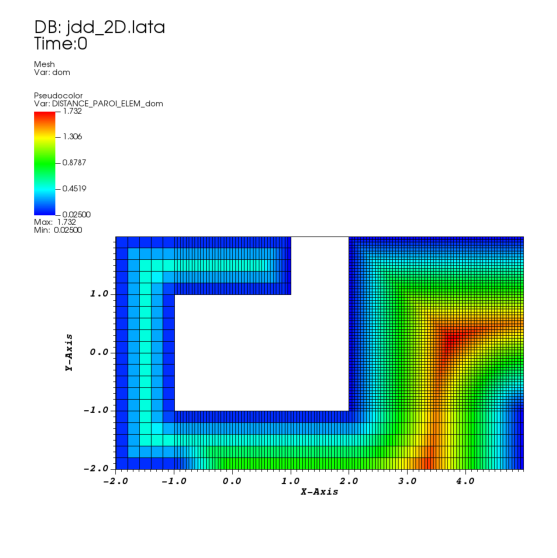

In [3]:
run.description("On regarde les resultats dans une geometrie compliquee en 2D et en 3D et on les compare aux solutions analytiques sur des sondes.")

fig=visit.showField("jdd_2D.lata","Pseudocolor","DISTANCE_PAROI_ELEM_dom")



### Description 
Le nom des sondes depend de l'endroit du maillage dans lequelle elles ont ete tirees

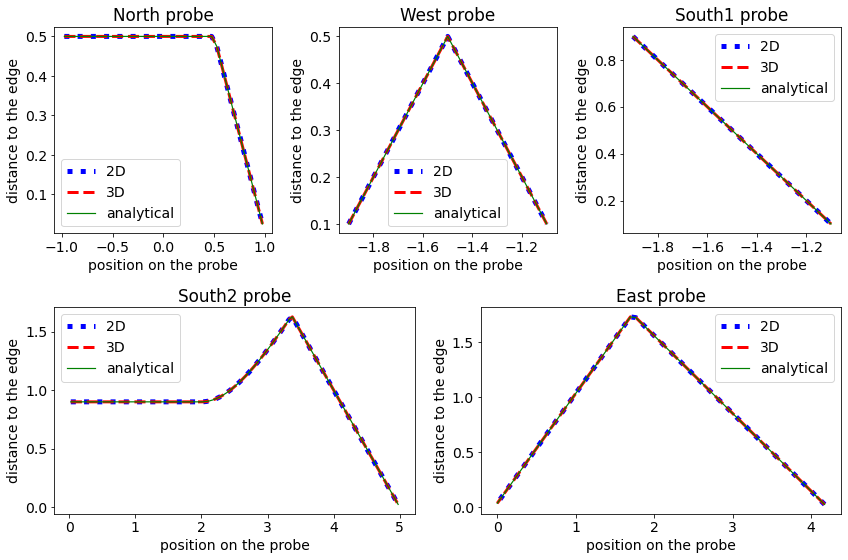

In [4]:
run.description("Le nom des sondes depend de l'endroit du maillage dans lequelle elles ont ete tirees")

d3_n = np.array(plot.loadText("jdd_3D_NORD.son")[1::])
d2_n = np.array(plot.loadText("jdd_2D_NORD.son")[1::])
x_n = np.linspace(-.975, .975, 40)
def d_n_ana(x) :
    return 0.5 - (np.maximum(x, 0.5)-0.5)

d2_o = np.array(plot.loadText("jdd_2D_OUEST.son")[1::])
d3_o = np.array(plot.loadText("jdd_3D_OUEST.son")[1::])
x_o = np.linspace(-1.9, -1.1, 5)
def d_o_ana(x) :
    return .5-np.abs(x+1.5)

d2_s1 = np.array(plot.loadText("jdd_2D_SUD1.son")[1::])
d3_s1 = np.array(plot.loadText("jdd_3D_SUD1.son")[1::])
x_s1 = np.linspace(-1.9, -1.1, 5)
def d_s1_ana(x) :
    return np.absolute(x+1)

d2_s2 = np.array(plot.loadText("jdd_2D_SUD2.son")[1::])
d3_s2 = np.array(plot.loadText("jdd_3D_SUD2.son")[1::])
x_s2 = np.linspace(.025, 4.975, 100)
def d_s2_ana(x) :
    return np.minimum( 5-x , ( np.maximum(x-2, 0)**2 + 0.9**2)**.5 )

d2_e = np.array(plot.loadText("jdd_2D_EST.son")[1::])
d3_e = np.array(plot.loadText("jdd_3D_EST.son")[1::])
x_e = np.linspace(2**0.5*2.95, 0, 60)
def d_e_ana(x) :
    x_loc = 4.975-x/2**.5
    y_loc = -.975+x/2**.5
    return np.minimum( ((x_loc-5)**2+(y_loc+1)**2)**.5 , x_loc-2)


fig = plt.figure(figsize=(12, 8))

plt.subplots_adjust(hspace= 0.3)

sub1 = fig.add_subplot(2, 6, (1,2)) 
plt.title("North probe")
plt.plot(x_n, d2_n, ':b', linewidth = 5, label = '2D')
plt.plot(x_n, d3_n, '--r', linewidth = 3, label = '3D')
plt.plot(x_n, d_n_ana(x_n), '-', linewidth = 1.2,color = 'green', label = 'analytical')
plt.xlabel("position on the probe")
plt.ylabel("distance to the edge")
plt.legend()

sub2 = fig.add_subplot(2, 6, (3, 4)) 
plt.title("West probe")
plt.plot(x_o, d2_o, ':b',linewidth = 5, label = '2D')
plt.plot(x_o, d3_o, '--r', linewidth = 3, label = '3D')
plt.plot(x_o, d_o_ana(x_o), '-',linewidth = 1.2,color = 'green', label = 'analytical')
plt.xlabel("position on the probe")
plt.ylabel("distance to the edge")
plt.legend()

sub3 = fig.add_subplot(2, 6, (5, 6)) 
plt.title("South1 probe")
plt.plot(x_s1, d2_s1, ':b',linewidth = 5, label = '2D')
plt.plot(x_s1, d3_s1, '--r', linewidth = 3, label = '3D')
plt.plot(x_s1, d_s1_ana(x_s1),'-', linewidth = 1.2,color = 'green', label = 'analytical')
plt.xlabel("position on the probe")
plt.ylabel("distance to the edge")
plt.legend()

sub4 = fig.add_subplot(2, 6, (7,9)) 
plt.title("South2 probe")
plt.plot(x_s2, d2_s2, ':b',linewidth = 5, label = '2D')
plt.plot(x_s2, d3_s2, '--r', linewidth = 3, label = '3D')
plt.plot(x_s2, d_s2_ana(x_s2),'-', linewidth = 1.2,color = 'green', label = 'analytical')
plt.xlabel("position on the probe")
plt.ylabel("distance to the edge")
plt.legend()

sub5 = fig.add_subplot(2, 6, (10,12)) 
plt.title("East probe")
plt.plot(x_e, d2_e, ':b',linewidth = 5, label = '2D')
plt.plot(x_e, d3_e, '--r', linewidth = 3, label = '3D')
plt.plot(x_e, d_e_ana(x_e),'-', linewidth = 1.2,color = 'green', label = 'analytical')
plt.xlabel("position on the probe")
plt.ylabel("distance to the edge")
plt.legend()

plt.tight_layout()

plt.show()


## Affichage de la distance sur des tetras un peu tordus en proche paroi

### Description 
On regarde les resultats dans un maillage triangulaire 2D et on les compare avec la theorie. On tire une sonde la les mailles proches de la paroi (Y=0.5). On voit que la solution exacte est trouvee dans l'element de bord grace a la boucle supplementaire sur ceux-ci, mais pas dans l'element suivant pour lequel la distance calculee est un peu elevee.

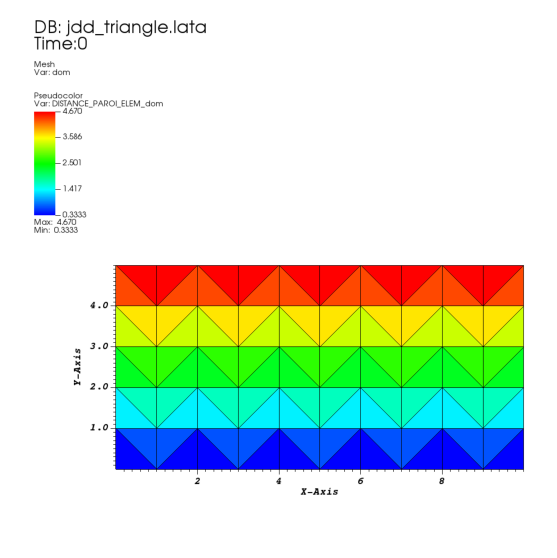

In [5]:
run.description("On regarde les resultats dans un maillage triangulaire 2D et on les compare avec la theorie. On tire une sonde la les mailles proches de la paroi (Y=0.5). On voit que la solution exacte est trouvee dans l'element de bord grace a la boucle supplementaire sur ceux-ci, mais pas dans l'element suivant pour lequel la distance calculee est un peu elevee.")

fig=visit.showField("jdd_triangle.lata","Pseudocolor","DISTANCE_PAROI_ELEM_dom")

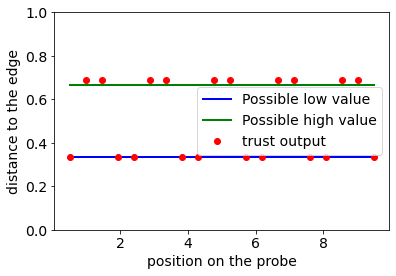

In [6]:
d = np.array(plot.loadText("jdd_triangle_DIST.son")[1::])
x = np.linspace(0.5, 9.5, 20)

d_min = np.linspace(0.333333, 0.333333, 20)
d_max = np.linspace(0.666666, 0.666666, 20)

plt.plot(x, d_min, 'b', linewidth = 2, label = 'Possible low value')
plt.plot(x, d_max, 'g', linewidth = 2, label = 'Possible high value')
plt.plot(x,     d, 'or', label = 'trust output')
plt.xlabel("position on the probe")
plt.ylabel("distance to the edge")
plt.legend()

plt.ylim(0, 1)

plt.show()